# Chapter 3 Descriptive Statistics: Tabular and Graphical Display

**Data** are pieces of information that usually comes with high volume. It is neither efficient nor economical to demonstrate the entire dataset to your audience. Therefore, we use **descriptive statistics** to summarize and present the most relevant information.

*Descriptive analysis* is the start point of statistical analyses, it provides summary of the data set which can be *tabular*, *graphical*, or *numerical*. A good data analyst should have all of these tools in their toolkit and be able to choose the most suitable descriptive presentation according to the audience of the analysis. In this chapter, we will focus on the tabular and graphical display of descriptive statistics. We will categorize tools by the number of variables to be analyzed and their continuity.

## 3.1 One Discrete Variable

We begin our discussion by learning to **slice** a pandas dataframe and extract only one variable, the resulting single column belongs to the **Series** class.

Let's begin our analysis by importing the "affairs" example dataset from the wooldridge module. Descriptions of this dataset can be found [here](https://rdrr.io/cran/wooldridge/man/affairs.html).

In [1]:
import wooldridge as woo
import pandas as pd

# Import the affairs dataset
affairs = woo.data("affairs")
affairs.head()

,id,male,age,yrsmarr,kids,relig,educ,occup,ratemarr,naffairs,affair,vryhap,hapavg,avgmarr,unhap,vryrel,smerel,slghtrel,notrel
0,4,1,37.0,10.0,0,3,18,7,4,0,0,0,1,0,0,0,0,1,0
1,5,0,27.0,4.0,0,4,14,6,4,0,0,0,1,0,0,0,1,0,0
2,6,1,27.0,1.5,0,3,18,4,4,3,1,0,1,0,0,0,0,1,0
3,11,0,32.0,15.0,1,1,12,1,4,0,0,0,1,0,0,0,0,0,0
4,12,0,27.0,4.0,1,3,17,1,5,3,1,1,0,0,0,0,0,1,0


Use DataFrame.**info()** method to display the number of observations, all column name, and their datatypes

In [2]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        601 non-null    int64  
 1   male      601 non-null    int64  
 2   age       601 non-null    float64
 3   yrsmarr   601 non-null    float64
 4   kids      601 non-null    int64  
 5   relig     601 non-null    int64  
 6   educ      601 non-null    int64  
 7   occup     601 non-null    int64  
 8   ratemarr  601 non-null    int64  
 9   naffairs  601 non-null    int64  
 10  affair    601 non-null    int64  
 11  vryhap    601 non-null    int64  
 12  hapavg    601 non-null    int64  
 13  avgmarr   601 non-null    int64  
 14  unhap     601 non-null    int64  
 15  vryrel    601 non-null    int64  
 16  smerel    601 non-null    int64  
 17  slghtrel  601 non-null    int64  
 18  notrel    601 non-null    int64  
dtypes: float64(2), int64(17)
memory usage: 89.3 KB


There are a total of 601 observations and 19 variables in the affairs dataset. Let's extract the kids column

In [3]:
# Extract the kids column
affairs["kids"]

0      0
1      0
2      0
3      1
4      1
      ..
596    0
597    1
598    1
599    1
600    1
Name: kids, Length: 601, dtype: int64

In [4]:
type(affairs["kids"])

pandas.core.series.Series

> The single column is stored as a **Series** class.

Next, let's convert it to a **categorical** data type, in order to use methods designed for categorical objects.

In [5]:
# Use the .astype method
kids=affairs["kids"].astype("category")
kids

0      0
1      0
2      0
3      1
4      1
      ..
596    0
597    1
598    1
599    1
600    1
Name: kids, Length: 601, dtype: category
Categories (2, int64): [0, 1]

Now that we have a categorical array, we can play around with its [attributes and methods](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.categories.html)

In [6]:
print("The categories of this categorical includes {}.".format(kids.cat.categories))
print("Are these categories ordered?: {}".format(kids.cat.ordered))

The categories of this categorical includes Int64Index([0, 1], dtype='int64').
Are these categories ordered?: False


In [7]:
# Assign labels to each category: 0 -> "no", 1-> "yes"

"""
[0,1] are the original category names, we replace the two names with ["no", "yes"], respectively. 
Note that the order matters
"""

kids.cat.categories = ["no","yes"]
print(kids.head())

# assign the new categorical column back to the dataframe
affairs["kids"] = kids

0     no
1     no
2     no
3    yes
4    yes
Name: kids, dtype: category
Categories (2, object): ['no', 'yes']


### 3.1.1 Frequency Distribution table

The most commonly used tabular display of a discrete variable is the frequency distribution table

> A frequency distribution is a tabular summary of data showing the number (frequency) of observations in each of several *nonoverlapping* categories or classes.

Both series objects and categorical objects have the [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method that returns a frequency distribution table.

In [8]:
freq = kids.value_counts()
freq

yes    430
no     171
Name: kids, dtype: int64

From this table, we can see that there are 430 yes observations and 171 no observations. 
> The value_counts() method returns a Series datatype. So, refer to the [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) documentation for its attributes and methods

### 3.1.2 Relative Frequency Distribution table

A frequency distribution shows the number (frequency) of observations in each of several nonoverlapping categories. However, we are often interested in the proportion, or percentage, of observations in each class. 

> Relative frequency of a category = $\frac{\text{Frequency of the class}}{n}$

To generate a relative frequency table, assign True to the *normalize* parameter of the *value_counts()* method

In [9]:
rel_freq = kids.value_counts(normalize = True)
rel_freq

yes    0.715474
no     0.284526
Name: kids, dtype: float64

### 3.1.3 Bar Charts and Pie Charts

For the graphical displays we are going to use the [**matplotlib**](https://matplotlib.org/stable/index.html) module.

A **bar chart** is a graphical display for depicting categorical data summarized in a frequency, relative frequency distribution. On one axis of the chart (usually the horizontal axis), we specify the labels that are used for the categories. A frequency, relative frequency scale can be used for the other axis of the chart (usually the vertical axis). Then using a bar of fixed width drawn above each class label, we extend the length of the bar until we reach the frequency or relative frequency of the class.

Matplotlib is already integrated in the Anaconda distribution, so we can import this module directly.

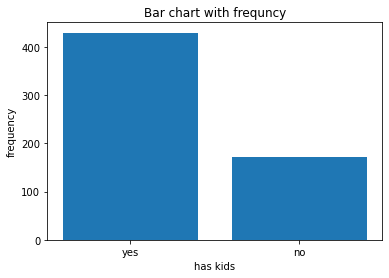

In [10]:
import matplotlib.pyplot as plt

plt.bar(x = freq.index, height=freq)
plt.title("Bar chart with frequncy") #set title
plt.xlabel("has kids") #set x label
plt.ylabel("frequency") #set y label
plt.show() # print plot to the screen

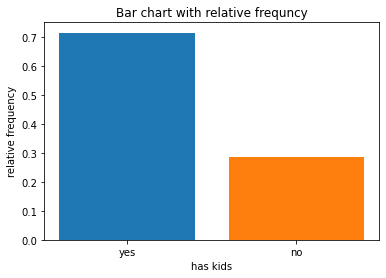

In [11]:
# relative frequency bar plot

plt.bar(x = rel_freq.index, height=rel_freq, color=["tab:blue","tab:orange"])
plt.title("Bar chart with relative frequncy") #set title
plt.xlabel("has kids") #set x label
plt.ylabel("relative frequency") #set y label

plt.show()

> Try different colors using this [color table](https://matplotlib.org/stable/gallery/color/named_colors.html).


The **pie chart** provides another graphical display for presenting relative frequency for categorical data.

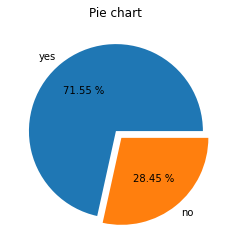

In [12]:
plt.pie(x = rel_freq, labels=rel_freq.index, explode=[0,0.1], autopct="%.2f %%")
plt.title("Pie chart")

plt.show()

## 3.2 One Continuous Variable

### 3.2.1 Frequency distribution
When dealing with a continuous variable, we can categorize its values into several bins and then treat it as a categorical variable. For example, the age column in the affairs dataset can be treated as a continuous variable. 

By setting the **bins** parameter of the [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method, we can create equal-width bins and count the number of the observations within each bin. But an advanced way of creating categorical variables is using the [pd.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) method.

In [13]:
# create a list of a categories (10-19,20-29,30-39,40-49,50-59)

"""
Use list comprehensions, which create a list from a list
[function(i) for i in somelist]
"""

bin_edges = [10,20,30,40,50,60]
labels=["{} to {}".format(i, i+9) for i in [10,20,30,40,50]]

# cut the age column and export the result to a new column to the dataframe
affairs["age_cat"] = pd.cut(x=affairs["age"],bins = bin_edges, labels=labels, right=False)

# show results
affairs[["age","age_cat"]].head()

,age,age_cat
0,37.0,30 to 39
1,27.0,20 to 29
2,27.0,20 to 29
3,32.0,30 to 39
4,27.0,20 to 29


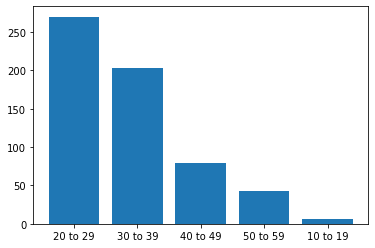

In [14]:
# Similar to 2.1.3, we can draw bar charts using this frequency distribution table
freq = affairs["age_cat"].value_counts()
plt.bar(x=freq.index, height=freq)
plt.show()

### 3.2.2 Histogram

A common graphical display of continuous data is a **histogram**. A histogram is constructed by placing the variable of interest on the horizontal axis and the frequency, relative frequency, or density on the vertical axis.

We can plot our first histogram and take a look at the distribution of the age variable.

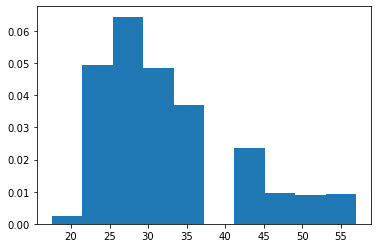

     0.00 -  0.05 -  0.06 -  0.05 -  0.04 -  0.00 -  0.02 -  0.01 -  0.01 -  0.01
17.50 - 21.45 - 25.40 - 29.35 - 33.30 - 37.25 - 41.20 - 45.15 - 49.10 - 53.05 - 57.00


In [32]:
[n, bins, patches] = plt.hist(x=affairs["age"], density=True) # use a list of variable names to catch all the returns
plt.show()

print(" "*4+" - ".join(["{:5.2f}".format(i) for i in n])) # print the value of each bin
print(" - ".join(["{:5.2f}".format(i) for i in bins])) # print bin edges


One of the most important use s of a histogram is to provide information about the shape, or form, of a distribution. From the above age histogram, we see that the age distribution is right-skewed, with the most observations between 35.40 and 29.35 years old. No observations are found in [37.25, 41.20).

## 3.3 One Continuous Variable
## 3.4 Two Continuous Variables
## 3.5 Data Visualization - Best Practices